### This notebook contains summary of concepts and code snippets learned while doing the mission "Data Cleaning and Analysis".

## WORLD HAPPINESS SCORE

In [2]:
#import sys  
#!{sys.executable} -m pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
# happiness2015.info()  # shows info about the table/dataframe
# happiness2015.head()  # prints/returns first 5 rows

In [5]:
# To get first 5 rows of the dataframe
first_5 = happiness2015.iloc[:5, :]

If we try to plot happiness score for every country, the plot will be cluttered and unreadable.
If we check the table and think about "group", we can see every country is grouped into region. Let's now check how many unique regions do we have.

In [6]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Okay, let's try and plot the happiness score of "Southern Asia" group.

In [7]:
so_asia = happiness2015[happiness2015["Region"] == "Southern Asia"]
so_asia

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


#### How to directly plot BAR from DATAFRAME

<AxesSubplot:title={'center':'Southern Asia Happiness Scores'}, ylabel='Country'>

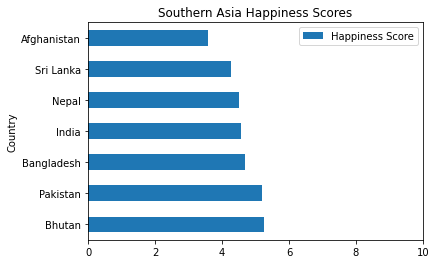

In [8]:
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

------------------------------ __AGGREGATION__ -----------------------------
---

__Aggregation__ is applying a statistical operation to groups of data. It reduces dimensionality so that the dataframe returned will contain just one value for each group. The aggregation process can be broken down into three steps:

1. Split the dataframe into groups.
2. Apply a function to each group.
3. Combine the results into one data structure.

#### Pandas groupby syntax

In [9]:
grouped = happiness2015.groupby("Region")
n_america = grouped.get_group("North America")
# n_america
# grouped.groups

`grouped.groups` attribute/property returns dictionary with unique region name as key and `iloc` or `index` of items (falling under that region) as list of value(s).

Similary `grouped` has methods such as `min`, `max`, `size`, `mean`, `sum`, `count`

#### AGGREGATION by GROUPBY

In [10]:
happiness2015.groupby('Region')['Happiness Score'].agg([max, min])  # if list of methods
happiness2015.groupby('Region')['Happiness Score'].mean()  # if only single method

def custom_method(group):
    return (group.max() - group.min())

happy_grouped = happiness2015.groupby('Region')['Happiness Score']
happy_grouped.agg(custom_method)

Region
Australia and New Zealand          0.002
Central and Eastern Europe         2.287
Eastern Asia                       1.424
Latin America and Caribbean        2.708
Middle East and Northern Africa    4.272
North America                      0.308
Southeastern Asia                  2.979
Southern Asia                      1.678
Sub-Saharan Africa                 2.638
Western Europe                     2.730
Name: Happiness Score, dtype: float64

#### AGGREGATION by PIVOT_TABLE

In [11]:
import numpy as np
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)
# first argument is for value, second argument is for index
# or we can say pivot_table for "Happiness Score" based on "Region"
# margins executes the aggfunc for enitre 'values' column instead of region-wise aggregation

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [12]:
# 
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [13]:
happiness2015.groupby('Region')[['Happiness Score', 'Family']].agg(np.mean)

,Happiness Score,Family
Region,,
Australia and New Zealand,7.285000,1.314450
Central and Eastern Europe,5.332931,1.053042
Eastern Asia,5.626167,1.099427
Latin America and Caribbean,6.144682,1.104720
Middle East and Northern Africa,5.406900,0.920490
North America,7.273000,1.284860
Southeastern Asia,5.317444,0.940468
Southern Asia,4.580857,0.645321
Sub-Saharan Africa,4.202800,0.809085


Both `groupby` and `pivot_table` does the same as of now except the additional `margins` part in `pivot_table` 🙃

Similary below is the example of `groupby` and `pivot_table` for multiple __values__ and multiple __aggregation functions__ applied on "Region" group

In [14]:
grouped = happiness2015.groupby("Region")[["Happiness Score", "Family"]]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(["Happiness Score", "Family"], "Region", aggfunc=[np.min, np.max, np.mean], margins=True)

--------------- __END OF "AGGREGATION BY GROUPBY AND PIVOT_TABLE"__ ------------
---

----------------------------- _JOINING DATA_ --------------------------
---

Concat two dataframes with different shape.

`axis=0` is gluing dataframe at the bottom i.e row wise

`axis=1` is gluing dataframe at the right i.e columns are added

```python
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016], ignore_index=True)  # axis=0 is default
rows = len(concat_axis0)
columns = len(concat_axis0.columns)
```

> #### Revision: Pandas `len`, `shape`, `size`

> - pandas.DataFrame
    * Display number of rows, columns, etc.: `df.info()`
    * Get the number of rows: `len(df)`
    * Get the number of columns: `len(df.columns)`
    * Get the number of rows and columns: `df.shape`
    * Get the number of elements: `df.size`
    
> - pandas.Series
    * Get the number of elements: `len(s)`, `s.size`

__MERGE__

`pd.merge(left=df1, right=df2, on="col_name", how="left", suffixes=("_x", "_y"))`  # `how = left, right, inner(default), outer`

`pd.merge` with `how="outer"` is same as `pd.concat` except `pd.concat` can join more than two dfs at a time while `pd.merge` can join only two at a time.

One more important differene is that `pd.merge` joins on `axis=1` only.

__merge based on index__

`left_index=True` and `right_index=True`

```python
merge_index_left = pd.merge(left=four_2015, right=three_2016, how="left", left_index=True, right_index=True, suffixes = ('_2015','_2016'))
```

The best explanation of understanding `concat`, `join` and `merge` is the official documentation which goes over all the famous scenarios of using the functions along with the examples.

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

> #### Revision: renaming column

> df.rename(columns={'old_col_name': 'new_col_name'}, inplace=True)

Below code snippet shows us a simple scenario where we combine three tables and visualize the "happiness score" for every year


```python
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table(index= "Year", values=["Happiness Score"])
pivot_table_combined.plot(kind="barh", title="Mean Happiness Scores by Year", xlim=(0, 10))
```

----------------------------------- __END OF JOINING DATA__ ---------------------------------
---

##  TRANSFORMING DATAFRAME/SERIES

We can use `apply`, `applymap` or `map` function to transform dataframe/series

`map` takes only one parameter which is a callable function

`apply` can also take second parameter which, for example, can be an argument to that callable function

`applymap` works on multiple columns at once, meaning, we can use `applymap` on df

`melt` to convert columns into a single column ("variable" and "value" column to be precise)

#### NOTE:

In general, we should only use the `apply()` method when a vectorized function does not exist. Recall that pandas uses __`vectorization`, the process of applying operations to whole series at once, to optimize performance__. When we use the `apply()` method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the `apply()` method.

In [15]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health',
           'Trust (Government Corruption)': 'Trust' }
happiness2015.rename(columns=mapping, inplace=True)

# Example of apply to know the percentage impact of different columns no happiness score
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness2015["Happiness Score"]
    return div * 100

factor_percentages = happiness2015[factors].apply(percentages)

__Example of `melt`__

`id_vars` is the list of columns in the df that needs to remain same whereas `value_vars` are the columns that need to be transformed into a single columns

In [22]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], 
               value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
melt[157:160]

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
157,Togo,Sub-Saharan Africa,158,2.839,Economy,0.20868,7.35
158,Switzerland,Western Europe,1,7.587,Family,1.34951,17.79
159,Iceland,Western Europe,2,7.561,Family,1.40223,18.55


__Example of plotting the above data as `PIE` chart__

<AxesSubplot:ylabel='value'>

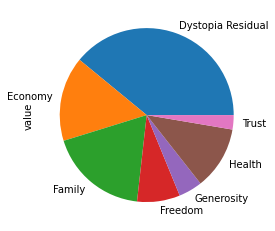

In [17]:
pv_melt = melt.pivot_table(index="variable", values="value")
pv_melt.plot(kind="pie", y="value", legend=False)

The above pie chart shows the impact of various factors on the __Happiness Score__

## SUMMARY OF TRANSFORMING DATA

#### APPLYING FUNCTIONS ELEMENT-WISE
Apply a function element-wise to a series:
```python
df[col_name].apply(function_name)
df[col_name].map(function_name)
```

Apply a function element-wise to a dataframe:
```python
df.applymap(function_name)
```

#### APPLYING FUNCTIONS ALONG AN AXIS
Apply a function along an axis, column-wise:
```python
df.apply(function_name)
```
#### RESHAPING DATAFRAMES
Reshape a dataframe:
```python
pd.melt(df, id_vars=[col1, col2], value_vars=[col3, col4])
```

## REGEX

If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats

`pattern = r"[1-2][0-9][0-9][0-9]" = r"([1-2][0-9]{3})"`  # example to search for year 2020 (and delete that year :P)

## HANDLING MISSING AND DUPLICATE DATA

### To check the summary of missing values in:

1. `small dataset`

__Example:__

```
missing = happiness2015['Happiness Score'].isnull()
happiness2015[missing]
```

2. `big dataset`

__Example:__

```
happiness2015.isnull().sum()
```

The result is a series in which:

> 2.1 The index contains the names of the columns in happiness2015.

> 2.2 The corresponding value is the number of null values in each column.

### One of the workflow to clean missing values:

1. Check for errors in data cleaning/transformation that result in missing values.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

__USEFUL INFO:__ Pandas replace a character in all column names
https://stackoverflow.com/questions/39741429/pandas-replace-a-character-in-all-column-names

Example syntax:

`happiness2015.columns = happiness2015.columns.str.replace("[()]", "").str.strip().str.upper()`